                              Analyzing the New York Squirrel Census
The goal of this analysis is to analyse the the New York squirrel data collected at the Central Park

In [1]:
#reading the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
squirrel = "squirrel.csv"
df = pd.read_csv(squirrel)

In [3]:
#data exploration
df.shape

(3023, 31)

In [4]:
df.head(4)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)


In [5]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

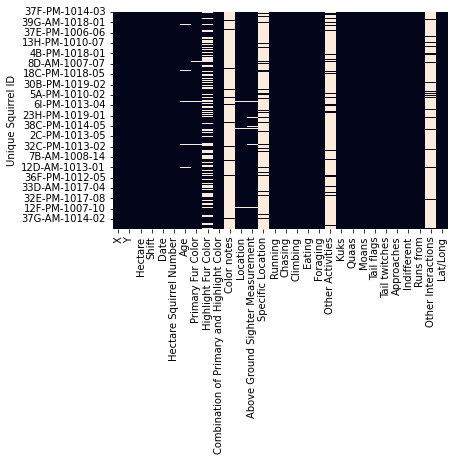

In [7]:
#exploring null values
import seaborn as sns
df_updated = df.set_index("Unique Squirrel ID")
sns.heatmap(df_updated.isnull(), cbar=False);

In [ ]:
inspecting the heatmap data above, it is observed that the 
"Color notes", "Specific Location", "Other Activities", "Other Interactions" columns contain too many null values,
the values are also not too important to our analysis. hence we will drop the columns

In [8]:
drop = ["Color notes", "Specific Location", "Other Activities", "Other Interactions"]
df.drop(columns=drop, axis=1, inplace=True)

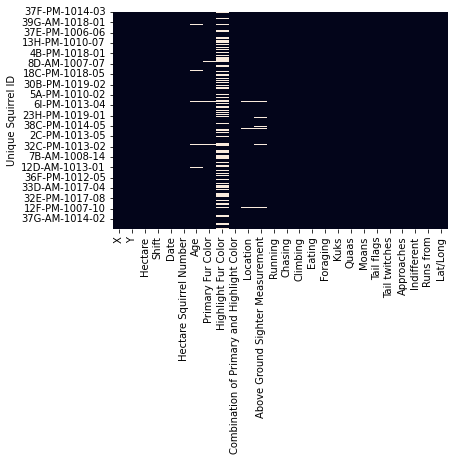

In [9]:
#inspecting the null values after dropping four columns
df_updated = df.set_index("Unique Squirrel ID")
sns.heatmap(df_updated.isnull(), cbar=False);

the highlight fur column also has relatively high null values, but we can still work with the data like that

In [11]:
curiosity = df["Tail twitches"].value_counts(dropna=False)
curiosity

False    2589
True      434
Name: Tail twitches, dtype: int64

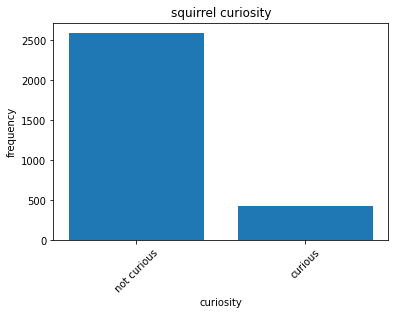

In [13]:
plt.bar(curiosity.index,curiosity)
plt.xticks(ticks=[0, 1], labels=["not curious", "curious"], rotation=45)
plt.title("squirrel curiosity")
plt.xlabel("curiosity")
plt.ylabel("frequency");

We can deduce from the data that the squirrel are not really curious animals, they were only curious less than 15% of the time
the data were taken

In [14]:
#age distribution of the squirrel
age_distribution = df["Age"].value_counts(dropna=False)
age_distribution

Adult       2568
Juvenile     330
NaN          121
?              4
Name: Age, dtype: int64

there is an age group described as "?", this is probably a mistake, since it's only 4 rows that are described as such
we can fill the rows with Adult since most of the rows are Adult

In [17]:
def new(function):
    if function == "?":
        return "Adult"
    else:
        return function
df["Age"] = df["Age"].apply(new)

In [19]:
age_distribution = df["Age"].value_counts(dropna=False)
age_distribution

Adult       2572
Juvenile     330
NaN          121
Name: Age, dtype: int64

In [20]:
#it is important to let the Nan values, reflect in our analysis, to achieve this, i will temporarily
#Nan values in the age column with y
df["Age"] = df.Age.replace(np.nan, "y")

In [21]:
age_distribution = df["Age"].value_counts(dropna=False)
age_distribution

Adult       2572
Juvenile     330
y            121
Name: Age, dtype: int64

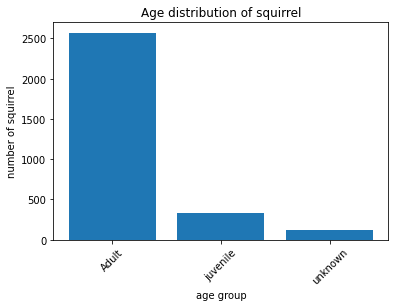

In [22]:
plt.bar(age_distribution.index,age_distribution)
plt.xticks(ticks=[0, 1, 2], labels=["Adult", "juvenile", "unknown"], rotation=45)
plt.title("Age distribution of squirrel")
plt.xlabel("age group")
plt.ylabel("number of squirrel");

It can be deduced that most of the squirrels are Adult as the adult account for 85% of the squirrels in central park when
the data was collected

In [23]:
#filling the column back with nan values
df["Age"] = df.Age.replace("y", np.nan)

In [24]:
df.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Location', 'Above Ground Sighter Measurement', 'Running', 'Chasing',
       'Climbing', 'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans',
       'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Lat/Long'],
      dtype='object')

In [25]:
#edit the primary fur column name to fit to our analysis
df.columns = ['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary_Fur_Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Location', 'Above Ground Sighter Measurement',
       'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
        'Lat/Long']

In [26]:
df.head(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary_Fur_Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,True,False,False,False,False,False,False,False,True,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,True,False,False,False,False,False,False,False,False,POINT (-73.9702676472613 40.7762126854894)


In [27]:
#fur color based on age
df["Primary_Fur_Color"] = df.Primary_Fur_Color.replace(np.nan, "y")

In [31]:
#extract the adult data, juvenile data and the unknown data separately
unknown = df["Age"].isnull()
unknown = df[age_boolian]
unknown

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary_Fur_Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,y,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,y,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.97428114848522 40.775533619083)
23,-73.967179,40.786735,25A-AM-1013-04,25A,AM,10132018,4,NaN,Gray,White,...,True,False,False,False,False,False,False,False,True,POINT (-73.9671786715256 40.7867352791232)
26,-73.957653,40.786866,29I-PM-1007-01,29I,PM,10072018,1,NaN,Gray,Cinnamon,...,True,False,False,False,False,False,False,False,False,POINT (-73.9576530157255 40.7868659490397)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,-73.980009,40.767778,1B-AM-1012-04,01B,AM,10122018,4,NaN,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,False,POINT (-73.9800094828465 40.7677782585639)
2994,-73.966844,40.787078,25B-PM-1007-01,25B,PM,10072018,1,NaN,Gray,Cinnamon,...,True,False,False,False,False,False,False,True,False,POINT (-73.9668442742942 40.7870781042595)
3008,-73.967564,40.782388,21D-PM-1008-02,21D,PM,10082018,2,NaN,Gray,White,...,True,False,False,False,False,False,False,False,False,POINT (-73.9675637870968 40.7823880671728)
3013,-73.966557,40.780435,19E-PM-1018-04,19E,PM,10182018,4,NaN,Gray,NaN,...,False,False,False,False,False,False,False,True,False,POINT (-73.9665572004288 40.7804347548303)


In [32]:
adult_boolian = df["Age"] == "Adult"
adult = df[adult_boolian]
adult

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary_Fur_Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,True,False,False,False,False,False,False,False,True,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,True,False,False,False,False,False,False,False,False,POINT (-73.9702676472613 40.7762126854894)
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,True,False,False,False,False,True,False,True,False,POINT (-73.9683613516225 40.7725908847499)
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,NaN,...,True,False,False,False,False,False,False,False,False,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,NaN,...,True,False,False,False,False,False,False,True,False,POINT (-73.9582694312289 40.7917367820255)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,-73.966290,40.784330,23C-AM-1019-01,23C,AM,10192018,1,Adult,Gray,"Cinnamon, White",...,False,True,False,False,False,False,False,True,False,POINT (-73.9662895079734 40.7843300758044)
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,True,False,False,False,False,False,False,False,True,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,True,False,False,False,False,False,False,True,False,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,True,False,False,False,False,False,False,True,False,POINT (-73.9665871993517 40.7836775064883)


In [33]:
juvenile_boolian = df["Age"] == "Juvenile"
juvenile = df[juvenile_boolian]
juvenile

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary_Fur_Color,Highlight Fur Color,...,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
17,-73.963818,40.792417,32A-PM-1013-03,32A,PM,10132018,3,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,False,POINT (-73.9638179439747 40.7924173263904)
34,-73.956570,40.790256,33H-AM-1019-02,33H,AM,10192018,2,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,False,POINT (-73.9565700386162 40.7902561000937)
38,-73.957465,40.789251,31H-PM-1008-02,31H,PM,10082018,2,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,True,False,True,False,POINT (-73.9574648097543 40.78925084286221)
47,-73.967563,40.781348,19D-AM-1007-01,19D,AM,10072018,1,Juvenile,Gray,NaN,...,False,False,False,False,False,False,False,False,False,POINT (-73.9675634326877 40.7813477352507)
48,-73.958497,40.798289,40B-AM-1019-03,40B,AM,10192018,3,Juvenile,Gray,White,...,False,False,False,False,False,True,True,False,False,POINT (-73.9584970643213 40.7982886348696)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,-73.964354,40.791757,31A-PM-1017-01,31A,PM,10172018,1,Juvenile,Cinnamon,"Gray, White",...,True,False,False,False,False,True,False,False,False,POINT (-73.9643538221947 40.7917565604735)
2991,-73.974606,40.768765,4F-PM-1013-03,04F,PM,10132018,3,Juvenile,Cinnamon,Gray,...,True,False,False,False,True,False,False,False,True,POINT (-73.9746063250438 40.7687654196811)
3003,-73.952848,40.792206,36I-PM-1007-08,36I,PM,10072018,8,Juvenile,Cinnamon,Gray,...,False,False,False,False,False,True,False,True,False,POINT (-73.9528482858163 40.7922056218325)
3015,-73.975646,40.770356,6D-PM-1020-02,06D,PM,10202018,2,Juvenile,Gray,NaN,...,False,False,False,False,False,True,False,False,True,POINT (-73.9756457597888 40.7703559775625)


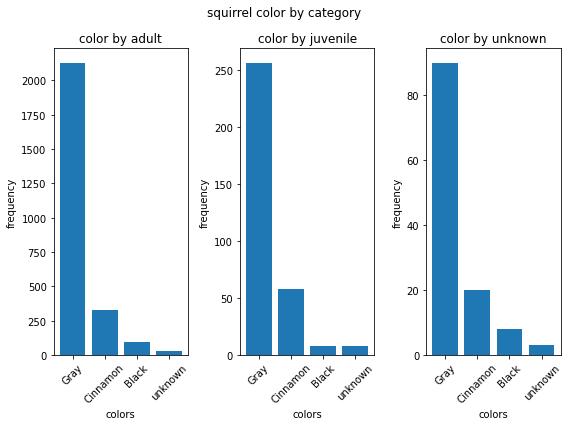

In [50]:
plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
adult_color = adult["Primary_Fur_Color"].value_counts(dropna=False)
plt.bar(adult_color.index,adult_color)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Gray", "Cinnamon", "Black", "unknown"], rotation=45)
plt.title("color by adult")
plt.xlabel("colors")
plt.ylabel("frequency")

plt.subplot(1, 3, 2)
juvenile_color = juvenile["Primary_Fur_Color"].value_counts(dropna=False)
plt.bar(juvenile_color.index,juvenile_color)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Gray", "Cinnamon", "Black", "unknown"], rotation=45)
plt.title("color by juvenile")
plt.xlabel("colors")
plt.ylabel("frequency")

plt.subplot(1, 3, 3)
unknown_color = unknown["Primary_Fur_Color"].value_counts(dropna=False)
plt.bar(unknown_color.index,unknown_color)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Gray", "Cinnamon", "Black", "unknown"], rotation=45)
plt.title("color by unknown")
plt.xlabel("colors")
plt.ylabel("frequency")
plt.suptitle("squirrel color by category")
plt.tight_layout();

it can be deduced that irrespective of the age category, the primary fur color of squirrels are mostly gray, followed
by cinnamon, then black

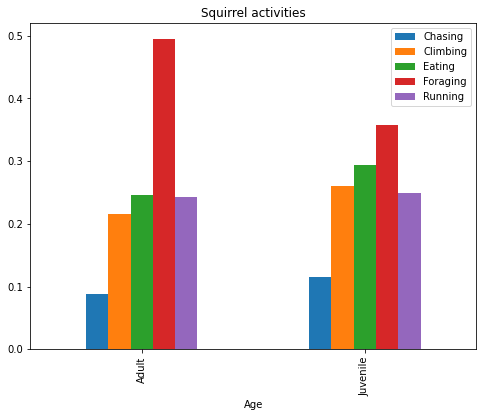

In [51]:
#what are the squirrels always doing
pivot_table_ = df.pivot_table(index='Age', values=['Foraging', "Chasing", "Running", "Climbing", "Eating"])
pivot_table_.plot(kind='bar', title='Squirrel activities', legend=True, figsize=(8,6));

the squirrels spend most of the time foraging(searching for food). if they are not searching for food they are mostly eating,
this occurs to both the adult and the juvenile squirrels. they rearely chase according to the data. running is also one of the
strong attributes of the squirrels

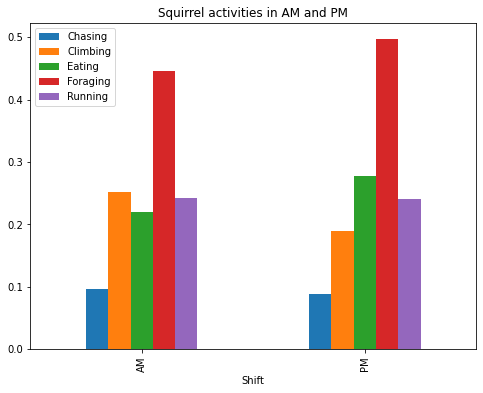

In [56]:
#what are the squirrels always doing using night and day category
pivot_table_ = df.pivot_table(index='Shift', values=['Foraging', "Chasing", "Running", "Climbing", "Eating"])
pivot_table_.plot(kind='bar', title='Squirrel activities in AM and PM', legend=True, figsize=(8,6));

It can be deduced from the data that while they spend most times foraging, their food search is easier at noon compared to
morning. That may explain why they climb more in the morning, perhaps searching for food.

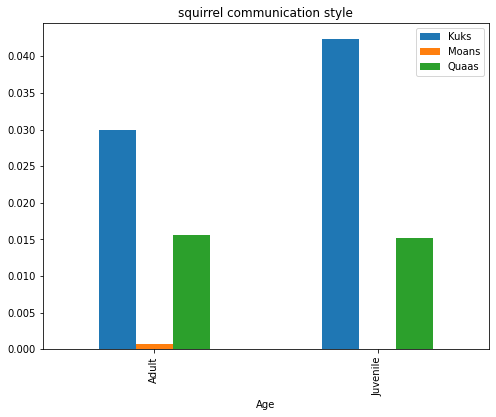

In [52]:
#how vocal are the squirrels
pivot = df.pivot_table(index='Age', values=['Kuks', "Quaas", "Moans"])
pivot.plot(kind='bar', title='squirrel communication style', legend=True, figsize=(8,6));

The squirrels kuks alot which they use for communication, they also quaas most of the time which they use to communicate
if there is a ground predator, they rearely moans which means air predator rearely attack them

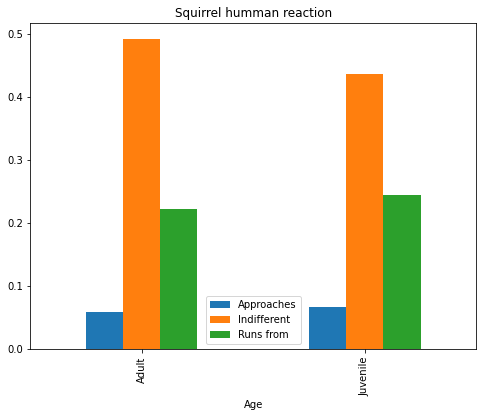

In [55]:
#squirrel reactions to humman
pivot_table_ = df.pivot_table(index='Age', values=['Approaches', "Indifferent", "Runs from"])
pivot_table_.plot(kind='bar', title='Squirrel humman reaction', legend=True, figsize=(8,6));

squirrels appear to be mostly indifferent when they see humman, they however run away atimes, they are rearely found approaching humman being

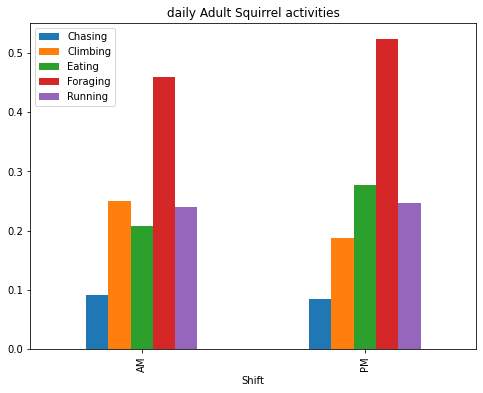

In [82]:
#comparing what the adult do in the morning and noon with what the juvenile do in the morning and at noon
#what are the squirrels always doing
pvt_table = adult.pivot_table(index='Shift', values=['Foraging', "Chasing", "Running", "Climbing", "Eating"])
pvt_table.plot(kind='bar', title='daily Adult Squirrel activities', legend=True, figsize=(8,6));

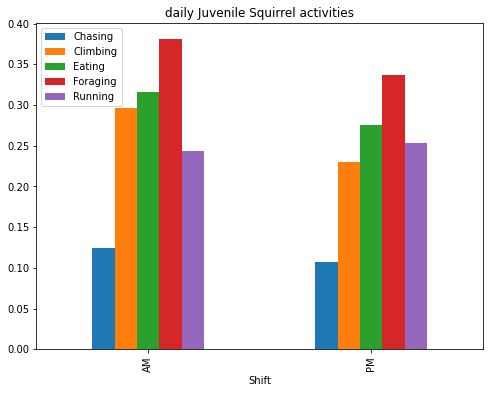

In [81]:
pvt_table_ = juvenile.pivot_table(index='Shift', values=['Foraging', "Chasing", "Running", "Climbing", "Eating"])
pvt_table_.plot(kind='bar', title='daily Juvenile Squirrel activities', legend=True, figsize=(8,6));

irrespective of their age category and part of the day, the squirrels are mostly found searching for food and are rearely
found chasing. They are found chasing only a couple of times. when they are not searching for food, the squirrels are mostly
found eating, the only exception is the adult squirrel who in the morning are mostly found climbing or running if they are not searching for food.